<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

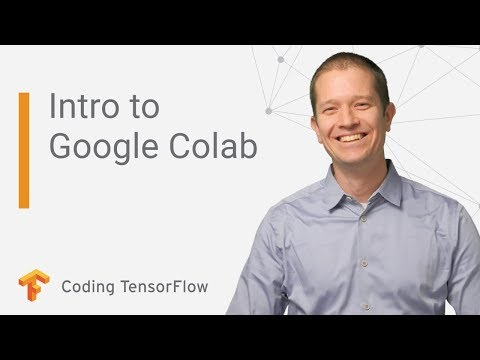

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

In [0]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.optimizers import rmsprop
import numpy as np
import numpy.random as nr
from tensorflow import set_random_seed
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [0]:
print(train_images[4].shape)

(28, 28)


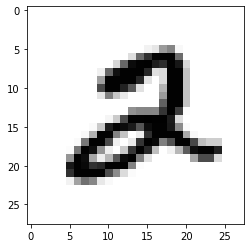

labels =2


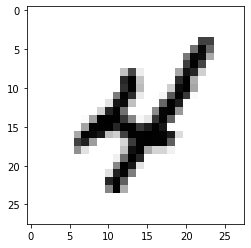

labels =4


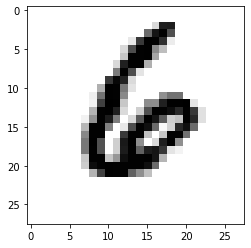

labels =6


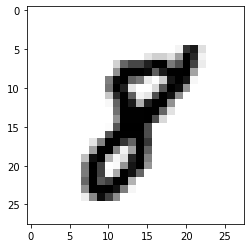

labels =8


In [0]:
for i in range(5, 20, 4):
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.show()
  print('labels =' + str(train_labels[i]))

In [0]:
#reshaping the train flattened images 60000 by 784
print(train_images.shape, train_labels.shape)
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28) (60000,)
(60000, 784)
float32


In [0]:
#same for the test_images
print(test_images.shape, test_labels.shape)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
print(test_images.shape)
print(test_images.dtype)

(10000, 28, 28) (10000,)
(10000, 784)
float32


In [0]:
#we are working on a classification problem, the label values must be of a categorical type
print(train_labels[5:,])

[2 1 3 ... 5 6 8]


In [0]:
#so the value coded as integers, these value must be coecered in a categorical type
train_labels = ku.to_categorical(train_labels)
print(train_labels[5:,])
#label values have been converted from integers to a set of 10 dummy variables of the one hot encoding.

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [0]:
#same for test_labels
test_labels = ku.to_categorical(test_labels)
print(test_labels[5:,])

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
#Defining the sequential model
aa = models.Sequential()
aa.add(layers.Dense(512, activation='relu', input_shape = (28*28, )))
aa.add(layers.Dense(10, activation= 'softmax'))

In [0]:
aa.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
aa.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5





60000/60000 [==============================] - 6s 100us/step - loss: 0.2597 - acc: 0.9240
Epoch 2/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.1044 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.0695 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0507 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0381 - acc: 0.9882


In [0]:
#comparing with the train accuracy
aa.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 54us/step


[0.06602036722257908, 0.9806]

In [0]:
#Training over epochs
aa = models.Sequential()
aa.add(layers.Dense(512, activation='relu', input_shape = (28*28, )))
aa.add(layers.Dense(10, activation= 'softmax'))
aa.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fit the model saving the results to a history file 
history = aa.fit(train_images, train_labels, epochs = 10, batch_size = 128, 
                 validation_data= (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2614 - acc: 0.9236 - val_loss: 0.1295 - val_acc: 0.9620
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.1089 - acc: 0.9677 - val_loss: 0.1061 - val_acc: 0.9676
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0722 - acc: 0.9787 - val_loss: 0.0803 - val_acc: 0.9768
Epoch 4/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0527 - acc: 0.9840 - val_loss: 0.0737 - val_acc: 0.9779
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0403 - acc: 0.9880 - val_loss: 0.0689 - val_acc: 0.9793
Epoch 6/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0310 - acc: 0.9906 - val_loss: 0.0688 - val_acc: 0.9804
Epoch 7/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0240 - acc: 0.9929 - val_loss: 0.0713 - val_acc

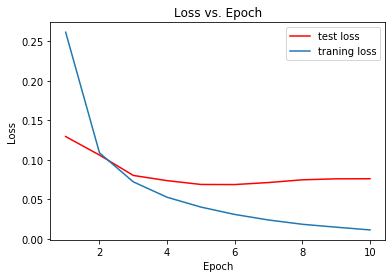

In [0]:
#plot
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
plot_loss(history)

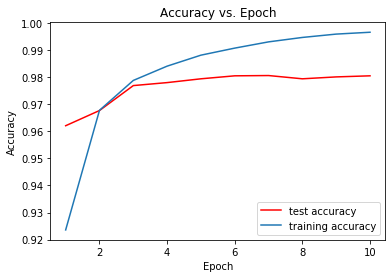

In [0]:
def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
    
plot_accuracy(history)

In [0]:
#Adding regularization to the model
aa = models.Sequential()
aa.add(layers.Dense(512, activation='relu', input_shape = (28*28, ),kernel_regularizer=regularizers.l2(0.001)))
aa.add(layers.Dense(10, activation= 'softmax'))
aa.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fit the model saving the results to a history file 
history = aa.fit(train_images, train_labels, epochs = 10, batch_size = 128, 
                 validation_data= (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.4974 - acc: 0.9158 - val_loss: 0.3139 - val_acc: 0.9430
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2487 - acc: 0.9575 - val_loss: 0.2136 - val_acc: 0.9592
Epoch 3/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2015 - acc: 0.9638 - val_loss: 0.1795 - val_acc: 0.9686
Epoch 4/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1802 - acc: 0.9678 - val_loss: 0.1740 - val_acc: 0.9680
Epoch 5/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1687 - acc: 0.9702 - val_loss: 0.1740 - val_acc: 0.9659
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1593 - acc: 0.9718 - val_loss: 0.1500 - val_acc: 0.9730
Epoch 7/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1531 - acc: 0.9736 - val_loss: 0.1692 - val_

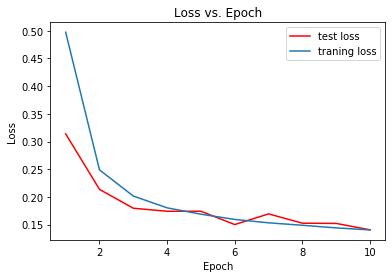

In [0]:
plot_loss(history)

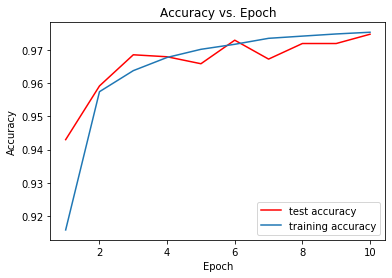

In [0]:
plot_accuracy(history)